# How to use the functions related to Fingerprints in the repository?

# SMILES -> Fingerprint

First, it's important to import some of the modules that have been built.


In [1]:
from src.utils import path_check
from scripts.process_mgf import mgf_get_smiles
from scripts.smiles_to_fingerprints import *

import warnings
warnings.filterwarnings("ignore")

And to have the data loaded, in this case a .mgf file.

In [2]:
mgf_data = r"/Users/carla/PycharmProjects/Mestrado/Transformer-Based-Models-for-Chemical-Fingerprint-Prediction/data/raw/cleaned_gnps_library.mgf"

path_check(mgf_data)

Once the data has been loaded, use the following function to obtain the molecules SMILES.

In [3]:
data = mgf_get_smiles(mgf_data, num_spectra=25)

Once you have your pd.DataFrame, you can generate the Fingerprints for the SMILES using the following function

In [4]:
smiles_to_fingerprint(smiles=data)

# .mgf -> Fingerprint

In [1]:
from src.utils import *
from scripts.ms_to_fingerprints import mgf_deconvoluter
from scripts.process_mgf import *
import numpy as np

In [2]:
mgf_data = r"/Users/carla/PycharmProjects/Mestrado/Transformer-Based-Models-for-Chemical-Fingerprint-Prediction/data/raw/cleaned_gnps_library.mgf"

path_check(mgf_data)

File found!


In [3]:
data = mgf_get_spectra(mgf_data=mgf_data, num_spectra=10)


ID: CCMSLIB00006112554
Tokenized m/z: [np.int64(3112), np.int64(2571), np.int64(2751), np.int64(2421), np.int64(2601), np.int64(2952), np.int64(3122), np.int64(2271), np.int64(2411), np.int64(2151), np.int64(2431), np.int64(90), np.int64(1361), np.int64(2581), np.int64(2932), np.int64(2761), np.int64(1401), np.int64(2291), np.int64(1151), np.int64(2612), np.int64(1541), np.int64(711), np.int64(2771), np.int64(1231), np.int64(2391), np.int64(1721), np.int64(1731), np.int64(991), np.int64(1221), np.int64(1260)]
Tokenized precursor: 4012
Normalized intensities: [0.40783883 0.12265617 0.10200148 0.09139625 0.03539368 0.02775527
 0.02744472 0.01850649 0.01635141 0.01424875 0.01346109 0.01170254
 0.01027102 0.00955186 0.00713095 0.00666057 0.00663947 0.00639067
 0.00618539 0.00615795 0.00613437 0.00582762 0.00581069 0.00534188
 0.00531056 0.00520717 0.00485742 0.00478807 0.00472425 0.0042534 ]


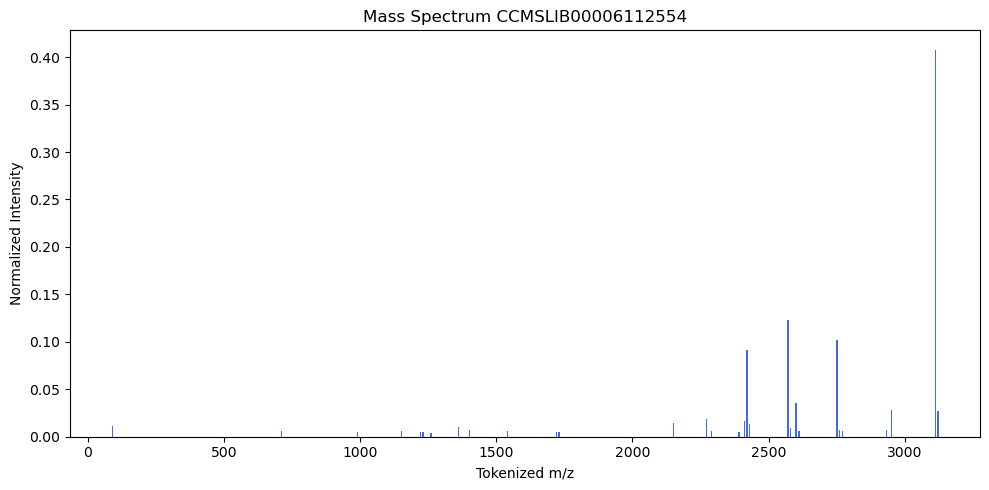


ID: CCMSLIB00006112555
Tokenized m/z: [np.int64(3112), np.int64(2571), np.int64(2751), np.int64(2421), np.int64(3122), np.int64(2601), np.int64(2952), np.int64(2271), np.int64(2411), np.int64(2581), np.int64(2761), np.int64(90), np.int64(2431), np.int64(2151), np.int64(2932), np.int64(80), np.int64(2291), np.int64(1401), np.int64(2771), np.int64(1361), np.int64(754), np.int64(3347), np.int64(603), np.int64(3734), np.int64(1907), np.int64(183), np.int64(778), np.int64(991), np.int64(299), np.int64(391)]
Tokenized precursor: 4012
Normalized intensities: [0.42141567 0.10833351 0.08668168 0.08126458 0.03855101 0.03314526
 0.03062297 0.01622228 0.01487457 0.01373375 0.01290275 0.01219925
 0.01213728 0.01182034 0.00918443 0.00857497 0.00798663 0.00730533
 0.00701414 0.00682015 0.00636396 0.00627661 0.00620899 0.00594898
 0.00589841 0.00583125 0.00578784 0.00565429 0.00565168 0.00558744]


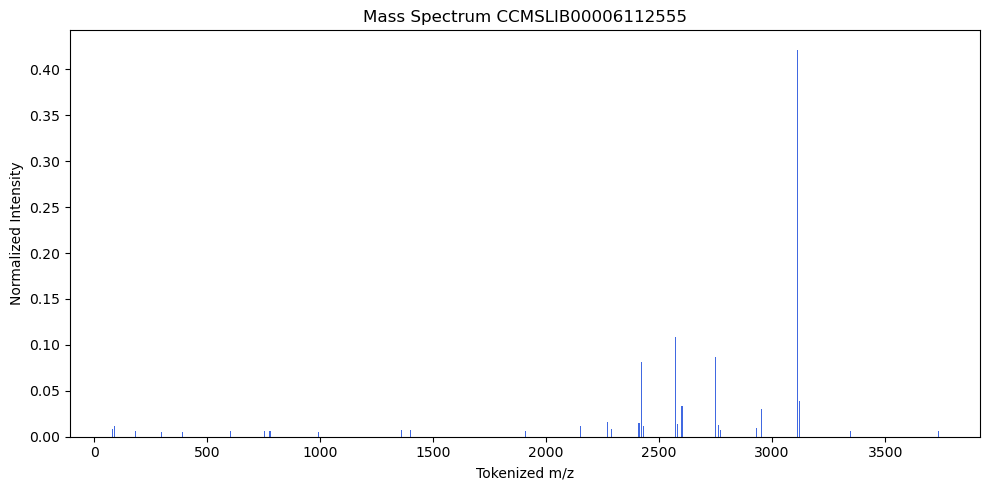


ID: CCMSLIB00006112556
Tokenized m/z: [np.int64(3112), np.int64(2571), np.int64(2421), np.int64(2751), np.int64(2601), np.int64(2271), np.int64(2952), np.int64(2411), np.int64(1361), np.int64(1401), np.int64(2151), np.int64(1235), np.int64(711), np.int64(2431), np.int64(1151), np.int64(1260), np.int64(1731), np.int64(1250), np.int64(2581), np.int64(1221), np.int64(1231), np.int64(2932), np.int64(1351), np.int64(2612), np.int64(1721), np.int64(1441), np.int64(991), np.int64(3872), np.int64(2391), np.int64(3122), np.int64(1411), np.int64(2291), np.int64(730), np.int64(2771), np.int64(1971), np.int64(1371), np.int64(2271), np.int64(1111), np.int64(2761), np.int64(871), np.int64(2291), np.int64(3412), np.int64(850), np.int64(951)]
Tokenized precursor: 3872
Normalized intensities: [0.30762624 0.11658358 0.10578947 0.09057546 0.03362355 0.02678174
 0.02430623 0.01981157 0.01722021 0.01692976 0.01627576 0.0129512
 0.01275818 0.01187961 0.01148041 0.01092736 0.00983037 0.00961278
 0.00923845 

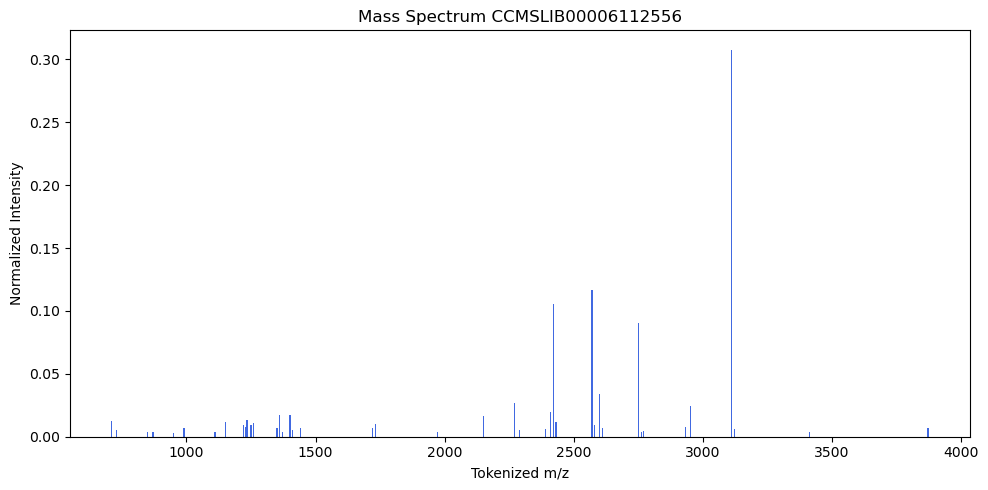


ID: CCMSLIB00006112557
Tokenized m/z: [np.int64(3112), np.int64(2571), np.int64(2421), np.int64(2751), np.int64(2601), np.int64(2952), np.int64(2271), np.int64(2151), np.int64(2411), np.int64(711), np.int64(1401), np.int64(3122), np.int64(1361), np.int64(1260), np.int64(2431), np.int64(1221), np.int64(991), np.int64(3872), np.int64(1731), np.int64(1231), np.int64(2581), np.int64(2612), np.int64(1721), np.int64(2771), np.int64(1250), np.int64(1235), np.int64(1411), np.int64(1151), np.int64(1441), np.int64(2932), np.int64(1111), np.int64(2291), np.int64(871), np.int64(2762), np.int64(2131), np.int64(2141), np.int64(2391)]
Tokenized precursor: 3872
Normalized intensities: [0.35630165 0.12767996 0.09556042 0.08753376 0.03713517 0.02295836
 0.02103972 0.0169959  0.01606068 0.01573148 0.01375704 0.01265423
 0.0123245  0.01180701 0.01136657 0.0111685  0.01078046 0.01054967
 0.00879817 0.00790295 0.00788044 0.00761415 0.0071151  0.00686415
 0.00671183 0.00615849 0.0060128  0.00586149 0.004779

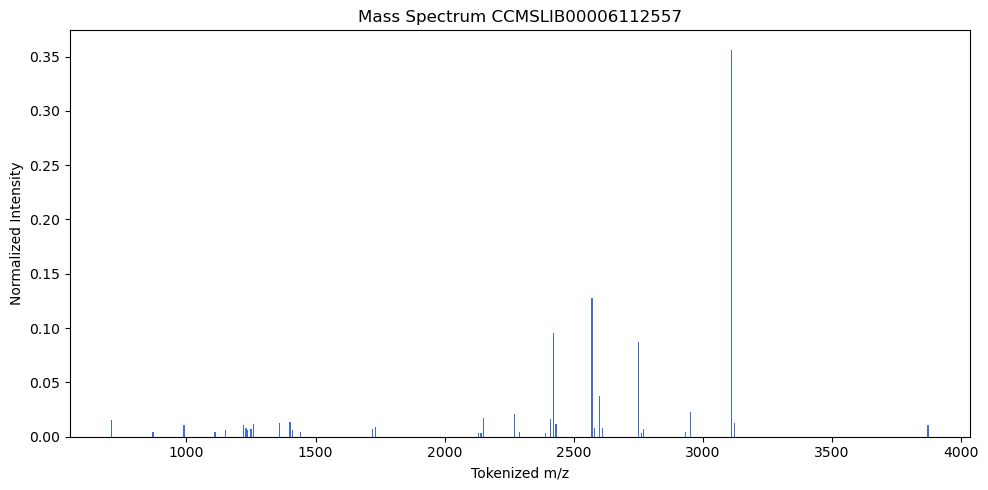


ID: CCMSLIB00006112558
Tokenized m/z: [np.int64(3112), np.int64(2571), np.int64(2751), np.int64(2421), np.int64(2601), np.int64(2952), np.int64(2271), np.int64(2151), np.int64(1401), np.int64(2411), np.int64(3122), np.int64(1361), np.int64(2431), np.int64(711), np.int64(2581), np.int64(1250), np.int64(991), np.int64(1260), np.int64(3113), np.int64(1721), np.int64(2612), np.int64(3872), np.int64(1151), np.int64(1221), np.int64(1351), np.int64(1235), np.int64(1441), np.int64(1731), np.int64(1231), np.int64(1411), np.int64(2771), np.int64(2291), np.int64(1391), np.int64(2932), np.int64(3412), np.int64(2271), np.int64(1111), np.int64(2291), np.int64(2761), np.int64(490), np.int64(2591)]
Tokenized precursor: 3872
Normalized intensities: [0.35514982 0.12366061 0.09415134 0.08745842 0.03108313 0.02384934
 0.02043179 0.01613401 0.01533311 0.01461589 0.0141475  0.01399864
 0.01228748 0.01163092 0.00955137 0.00937844 0.00935251 0.0091697
 0.0089515  0.00845914 0.00845632 0.00807271 0.00759173 0

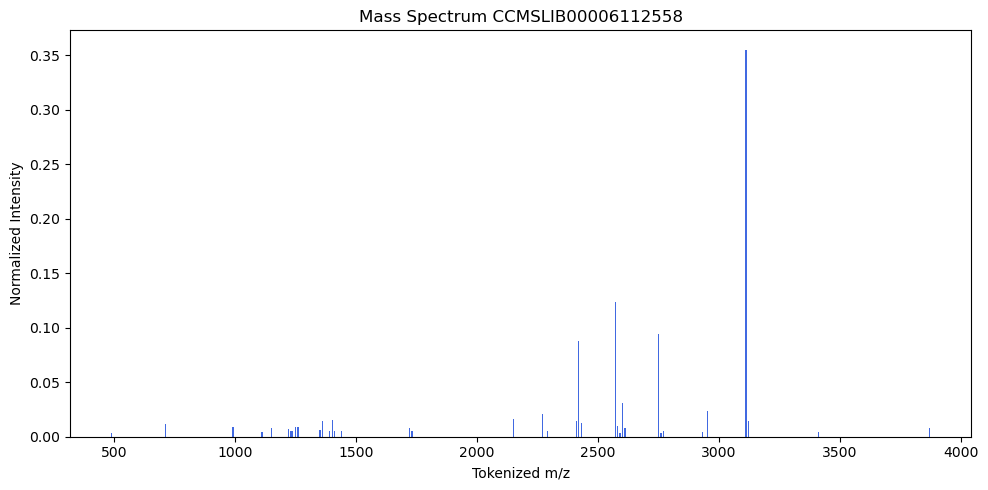


ID: CCMSLIB00006112559
Tokenized m/z: [np.int64(3112), np.int64(2571), np.int64(2751), np.int64(2421), np.int64(2601), np.int64(2952), np.int64(2271), np.int64(2151), np.int64(2411), np.int64(1361), np.int64(1401), np.int64(2431), np.int64(3122), np.int64(991), np.int64(711), np.int64(1235), np.int64(1151), np.int64(2581), np.int64(1260), np.int64(1250), np.int64(1221), np.int64(3872), np.int64(2771), np.int64(2932), np.int64(2612), np.int64(1731), np.int64(1231), np.int64(3412), np.int64(1441), np.int64(2391), np.int64(1111), np.int64(1351), np.int64(2271), np.int64(1191), np.int64(2912), np.int64(1411), np.int64(730), np.int64(2291)]
Tokenized precursor: 3872
Normalized intensities: [0.34192173 0.13241665 0.09306109 0.0926219  0.03246887 0.02947761
 0.02121528 0.01655    0.01640676 0.01584144 0.01533537 0.01314286
 0.01260501 0.01195663 0.01064046 0.01040993 0.01038359 0.01034393
 0.00968701 0.00840432 0.00770307 0.00747043 0.00655602 0.00639323
 0.0061429  0.00600621 0.00572356 0.0

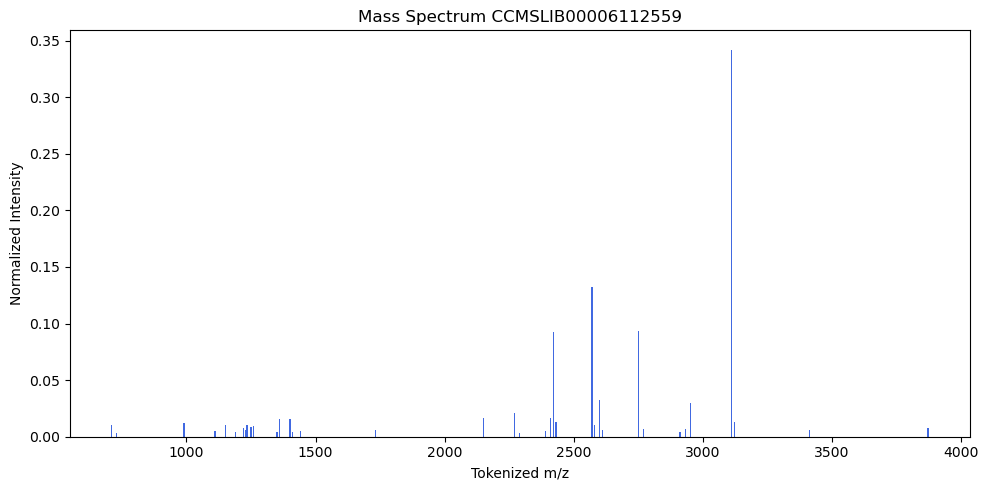


ID: CCMSLIB00006112560
Tokenized m/z: [np.int64(3112), np.int64(2571), np.int64(2421), np.int64(2751), np.int64(2601), np.int64(2952), np.int64(2271), np.int64(1361), np.int64(1401), np.int64(2151), np.int64(2411), np.int64(2431), np.int64(1260), np.int64(711), np.int64(1541), np.int64(1250), np.int64(3122), np.int64(991), np.int64(1731), np.int64(1221), np.int64(3872), np.int64(2581), np.int64(2612), np.int64(1231), np.int64(1411), np.int64(1151), np.int64(1351), np.int64(2291), np.int64(1091), np.int64(1111), np.int64(1441), np.int64(1191), np.int64(1721), np.int64(871), np.int64(2391), np.int64(3944), np.int64(3537), np.int64(3412), np.int64(2932), np.int64(103), np.int64(1304), np.int64(1261), np.int64(2912), np.int64(585), np.int64(3599), np.int64(1766), np.int64(3)]
Tokenized precursor: 3872
Normalized intensities: [0.29808701 0.13111888 0.10070771 0.08989012 0.03001533 0.02694283
 0.0234265  0.01685535 0.01639197 0.01619402 0.01554289 0.014473
 0.01189812 0.01141923 0.01093217 

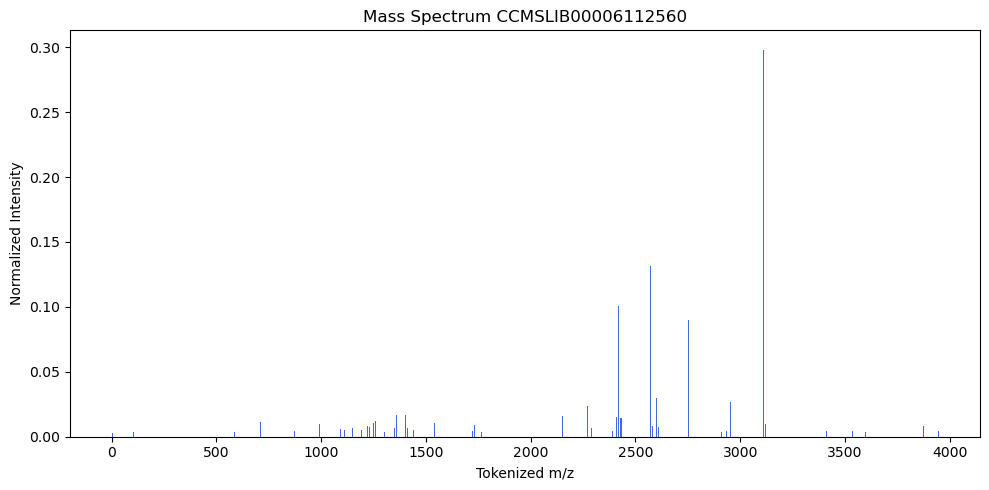


ID: CCMSLIB00006112561
Tokenized m/z: [np.int64(3112), np.int64(3412), np.int64(3122)]
Tokenized precursor: 3872
Normalized intensities: [0.88976335 0.06269488 0.04754177]


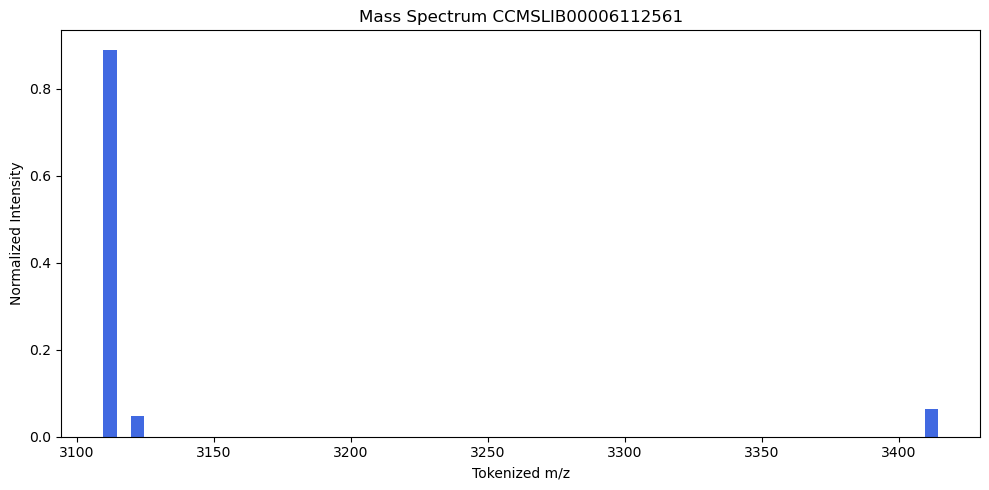


ID: CCMSLIB00006112562
Tokenized m/z: [np.int64(3112), np.int64(3412), np.int64(3122)]
Tokenized precursor: 3872
Normalized intensities: [0.89098014 0.06747343 0.04154644]


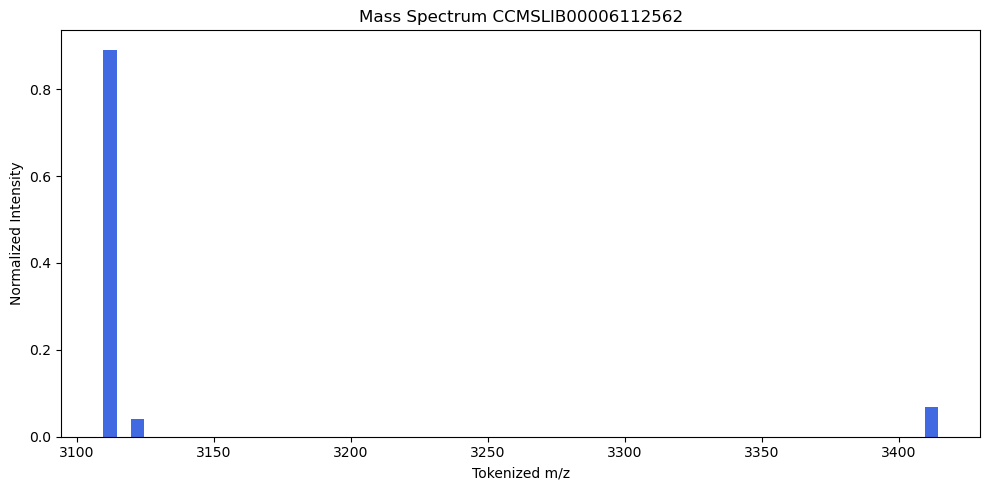


ID: CCMSLIB00006112563
Tokenized m/z: [np.int64(3112), np.int64(3412), np.int64(3122)]
Tokenized precursor: 3872
Normalized intensities: [0.88552582 0.06969843 0.04477574]


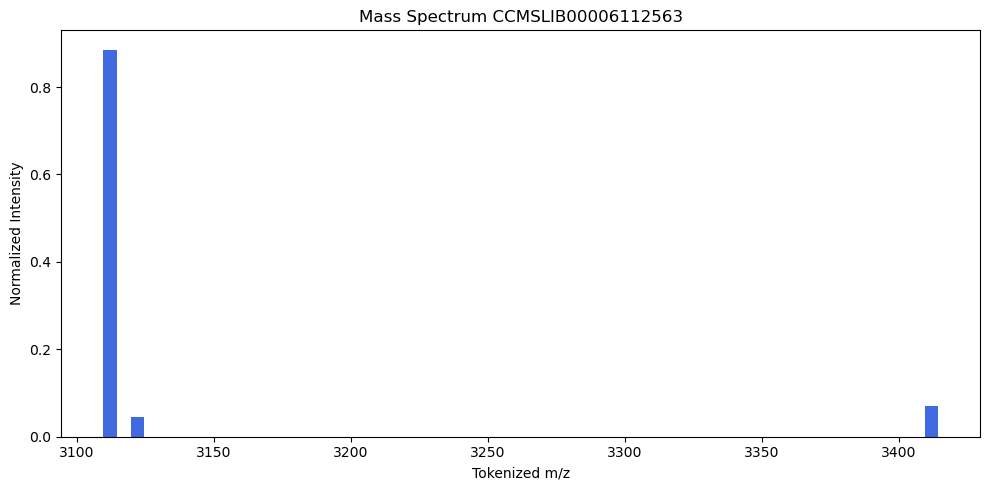

[('CCMSLIB00006112554',
  [np.int64(3112),
   np.int64(2571),
   np.int64(2751),
   np.int64(2421),
   np.int64(2601),
   np.int64(2952),
   np.int64(3122),
   np.int64(2271),
   np.int64(2411),
   np.int64(2151),
   np.int64(2431),
   np.int64(90),
   np.int64(1361),
   np.int64(2581),
   np.int64(2932),
   np.int64(2761),
   np.int64(1401),
   np.int64(2291),
   np.int64(1151),
   np.int64(2612),
   np.int64(1541),
   np.int64(711),
   np.int64(2771),
   np.int64(1231),
   np.int64(2391),
   np.int64(1721),
   np.int64(1731),
   np.int64(991),
   np.int64(1221),
   np.int64(1260)],
  np.int64(4012),
  array([0.40783883, 0.12265617, 0.10200148, 0.09139625, 0.03539368,
         0.02775527, 0.02744472, 0.01850649, 0.01635141, 0.01424875,
         0.01346109, 0.01170254, 0.01027102, 0.00955186, 0.00713095,
         0.00666057, 0.00663947, 0.00639067, 0.00618539, 0.00615795,
         0.00613437, 0.00582762, 0.00581069, 0.00534188, 0.00531056,
         0.00520717, 0.00485742, 0.00478807, 0

In [4]:
mz_vocabs = np.arange(50, 2000, 0.1)

mgf_deconvoluter(mgf_data=data, mz_vocabs=mz_vocabs ,min_num_peaks=2, max_num_peaks=100, noise_rmv_threshold=0.01, mass_error=0.01, log=True, plot=True)